# Correlations by ROI localizer

In [43]:
N_SUBJECTS = 4
INDEX_TO_ROI = {
    1: 'FFA',
    0: 'OFA',
    2: 'STS'
}
N_ROIS = len(INDEX_TO_ROI)
subject_one = {
    'split_test': ([.242, .204, .114], [.153, .130, .206]),
    'VGG24': ([.040, .027, -.025], [.202, .027, .177]),
    'VGG55': ([-.026, .055, -.1], [.223, .221, .125]),
    'VAE': ([.111, -.112, -.014], [.123, .16, .15]),
    'dVAE': ([.152, -.101, -0.050], [.081, .158, .158]),
    'dVAE+VAE': ([0.008, -.143, -0.092], [.175, .179, .163]),
    'dVAE+VGG': ([.102, -.088, -.045], [.105,.149,.165]),
    'VAE+VGG': ([.073,-.054,-.04], [.15,.207,.184])
}
subject_two = {
    'split_test': ([.296, .365, .280], [.159, .083, .138]),
    'VGG24': ([.423, .488, -.058], [.294, .090, .246]),
    'VGG55': ([.384, .499, -.039], [.224, .090, .177]),
    'VAE': ([.364, .401, -.086], [.136, .122, .159]),
    'dVAE': ([.315, .338, -0.114], [.163, .151, .165]),
    'dVAE+VAE': ([0.331, .316, -0.106], [.204, .130, .229]),
    'dVAE+VGG': ([.397, .445, -.05], [.221,.096,.178]),
    'VAE+VGG': ([.404,.455,-.018], [.202,.088,.151])
}
subject_three = {
    'split_test': ([.498, .563, .332], [.106, .098, .126]),
    'VGG24': ([.125, -.092, -.107], [.136, .069, .145]),
    'VGG55': ([.179, .232, .175], [.219, .102, .104]),
    'VAE': ([.133, .070, .044], [.107, .122, .117]),
    'dVAE': ([.113, .014, -0.075], [.101, .094, .097]),
    'dVAE+VAE': ([0.062, -.034, -0.049], [.111, .079, .116]),
    'dVAE+VGG': ([.112,-.129,-.119], [.108,.065,.137]),
    'VAE+VGG': ([.105,-.140,-.154], [.104,.067,.076])
}
subject_four = {
    'split_test': ([.147, .366, .221], [.196, .221, .154]),
    'VGG24': ([.007, .006, .242], [.159, .223, .167]),
    'VGG55': ([.189, .045, .080], [.174, .045, .080]),
    'VAE': ([.458, .215, .192], [.099, .158, .102]),
    'dVAE': ([.449, .267, .158], [.130, .124, .114]),
    'dVAE+VAE': ([0.499, .398, .203], [.110, .156, .128]),
    'dVAE+VGG': ([.145,.131,.252], [.149,.199,.1]),
    'VAE+VGG': ([.203,.096,.277], [.136,.217,.135])
}

SUBJECT_NUM_TO_DATA = {
    1: subject_one,
    2: subject_two,
    3: subject_three,
    4: subject_four
}

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


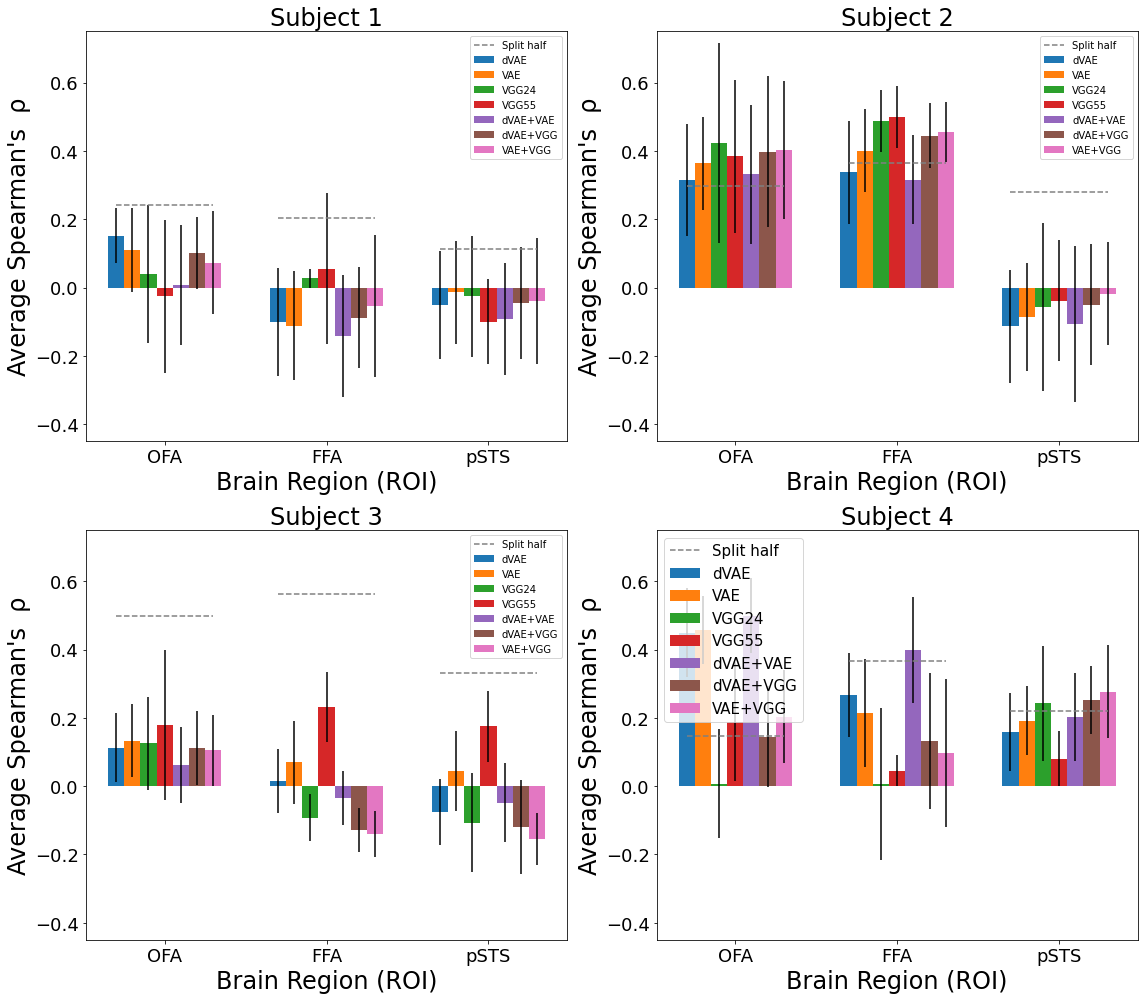

In [3]:
import matplotlib.pyplot as plt
import numpy as np

big_font = 24
medium_font=18

labels = ['OFA', 'FFA', 'pSTS']

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

Y_RANGE = [-.45, .75]
fig, axs = plt.subplots(2, 2, figsize=(16, 14))


for i, ax in zip(range(1,5), axs.flat):
    subject = SUBJECT_NUM_TO_DATA[i]

    rects2 = ax.bar(x - 3*width, subject['dVAE'][0], width, label='dVAE', yerr=subject['dVAE'][1])
    rects3 = ax.bar(x - 2*width, subject['VAE'][0], width, label='VAE', yerr=subject['VAE'][1])
    rects4 = ax.bar(x - width, subject['VGG24'][0], width, label='VGG24', yerr=subject['VGG24'][1])
    rects5 = ax.bar(x, subject['VGG55'][0], width, label='VGG55', yerr=subject['VGG55'][1])
    rects6 = ax.bar(x + width, subject['dVAE+VAE'][0], width, label='dVAE+VAE', yerr=subject['dVAE+VAE'][1])
    rects7 = ax.bar(x + 2*width, subject['dVAE+VGG'][0], width, label='dVAE+VGG', yerr=subject['dVAE+VGG'][1])
    rects8 = ax.bar(x + 3*width, subject['VAE+VGG'][0], width, label='VAE+VGG', yerr=subject['VAE+VGG'][1])


    for xi in x:
        ax.plot([xi-3*width,xi + 3*width], [subject['split_test'][0][xi], subject['split_test'][0][xi]], '--', label='Split half' if xi == 0 else None, color='gray')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average Spearman\'s  ρ',fontsize=big_font)
    ax.set_title('Subject {}'.format(i),fontsize=big_font)
    ax.tick_params(axis='y', labelsize=medium_font )
    ax.set_xticks(x)
    ax.set_xlabel('Brain Region (ROI)',fontsize=big_font)
    ax.set_xticklabels(labels, fontsize=medium_font)
    ax.legend()
    #ax.label_outer()
    ax.set_ylim(Y_RANGE)
    plt.legend(prop={'size': 15})
    #ax.bar_label(rects1, padding=3)
    #ax.bar_label(rects2, padding=3)


fig.tight_layout()
plt.savefig('per_subject_correlation.pdf')
plt.show()


# Average correlation

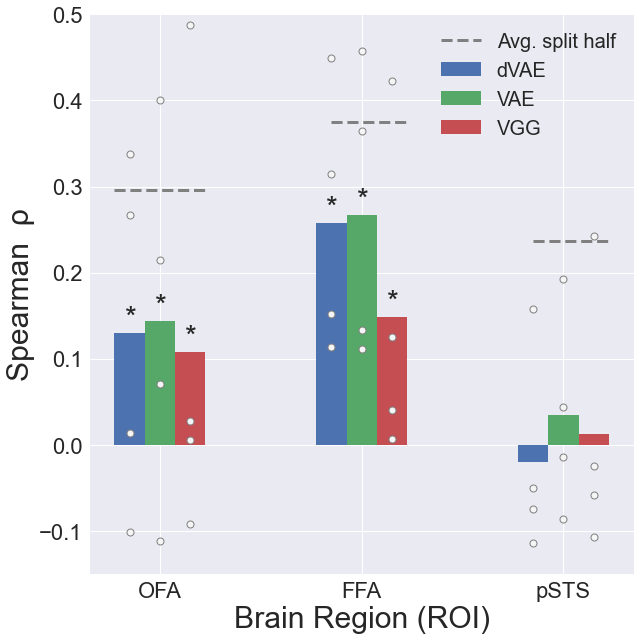

In [44]:

plt.style.use('seaborn')
import seaborn as sns

big_font = 24
medium_font=18

x = np.arange(len(labels))  # the label locations

split_test_results = np.empty((N_SUBJECTS, N_ROIS))
for key in SUBJECT_NUM_TO_DATA:
    value = SUBJECT_NUM_TO_DATA[key]
    split_test_results[key-1] = value['split_test'][0]
split_test_average = np.average(split_test_results, axis=0)
split_test_std = np.std(split_test_results, axis=0)

dVAE_test_results = np.empty((N_SUBJECTS, N_ROIS))
for key in SUBJECT_NUM_TO_DATA:
    value = SUBJECT_NUM_TO_DATA[key]
    dVAE_test_results[key-1] = value['dVAE'][0]
dVAE_test_average = np.average(dVAE_test_results, axis=0)
dVAE_test_std = np.std(dVAE_test_results, axis=0)

VAE_test_results = np.empty((N_SUBJECTS, N_ROIS))
for key in SUBJECT_NUM_TO_DATA:
    value = SUBJECT_NUM_TO_DATA[key]
    VAE_test_results[key-1] = value['VAE'][0]
VAE_test_average = np.average(VAE_test_results, axis=0)
VAE_test_std = np.std(VAE_test_results, axis=0)

VGG_test_results = np.empty((N_SUBJECTS, N_ROIS))
for key in SUBJECT_NUM_TO_DATA:
    value = SUBJECT_NUM_TO_DATA[key]
    VGG_test_results[key-1] = value['VGG24'][0]
VGG_test_average = np.average(VGG_test_results, axis=0)
VGG_test_std = np.std(VGG_test_results, axis=0)

VGG55_test_results = np.empty((N_SUBJECTS, N_ROIS))
for key in SUBJECT_NUM_TO_DATA:
    value = SUBJECT_NUM_TO_DATA[key]
    VGG55_test_results[key-1] = value['VGG55'][0]
VGG55_test_average = np.average(VGG55_test_results, axis=0)
VGG55_test_std = np.std(VGG55_test_results, axis=0)

dvae_vae_test_results = np.empty((N_SUBJECTS, N_ROIS))
for key in SUBJECT_NUM_TO_DATA:
    value = SUBJECT_NUM_TO_DATA[key]
    dvae_vae_test_results[key-1] = value['dVAE+VAE'][0]
dvae_vae_test_average = np.average(dvae_vae_test_results, axis=0)
dvae_vae_test_std = np.std(dvae_vae_test_results, axis=0)

dvae_vgg_test_results = np.empty((N_SUBJECTS, N_ROIS))
for key in SUBJECT_NUM_TO_DATA:
    value = SUBJECT_NUM_TO_DATA[key]
    dvae_vgg_test_results[key-1] = value['dVAE+VGG'][0]
dvae_vgg_test_average = np.average(dvae_vgg_test_results, axis=0)
dvae_vgg_test_std = np.std(dvae_vgg_test_results, axis=0)

vae_vgg_test_results = np.empty((N_SUBJECTS, N_ROIS))
for key in SUBJECT_NUM_TO_DATA:
    value = SUBJECT_NUM_TO_DATA[key]
    vae_vgg_test_results[key-1] = value['VAE+VGG'][0]
vae_vgg_test_average = np.average(vae_vgg_test_results, axis=0)
vae_vgg_test_std = np.std(vae_vgg_test_results, axis=0)

# Bar chart
fig, ax = plt.subplots(figsize=(9,9))


# Put OFA before FFA
dVAE_test_average[0], dVAE_test_average[1] = dVAE_test_average[1], dVAE_test_average[0]
VAE_test_average[0], VAE_test_average[1] = VAE_test_average[1], VAE_test_average[0]
VGG_test_average[0], VGG_test_average[1] = VGG_test_average[1], VGG_test_average[0]


width = 0.15
#rects1 = ax.bar(x - 1.5*width, split_test_average, width, label='Split test', yerr=split_test_std)
rects2 = ax.bar(x - width, dVAE_test_average, width, label='dVAE', edgecolor='black', linewidth=0)#, yerr=dVAE_test_std/2)
rects3 = ax.bar(x, VAE_test_average, width, label='VAE')#, yerr=VAE_test_std/2)
rects4 = ax.bar(x + width, VGG_test_average, width, label='VGG',)# yerr=VGG_test_std/2)
#rects5 = ax.bar(x, VGG55_test_average, width, label='VGG55', yerr=VGG55_test_std/2)
#rects6 = ax.bar(x + width, dvae_vae_test_average, width, label='dVAE+VAE', yerr=dvae_vae_test_std/2)
#rects7 = ax.bar(x + 2*width, dvae_vgg_test_average, width, label='dVAE+VGG', yerr=dvae_vgg_test_std/2)
#rects8 = ax.bar(x + 3*width, vae_vgg_test_average, width, label='VAE+VGG', yerr=vae_vgg_test_std/2)


# Scatter plot
#split_test_x = x - 1.5*width
dvae_x = x - 1*width
vae_x = x
vgg_x = x + width

i_to_marker = {
    1: '+',
    2: 'x',
    3: 'o',
    4: 's'
}

#0072d1
#67728b
#5872a2
#5872a2

for i_subject in range(1, 1+N_SUBJECTS):
    x_ = np.concatenate([dvae_x, vae_x, vgg_x])
    subject = SUBJECT_NUM_TO_DATA[i_subject]
    dvae = subject['dVAE'][0]
    vae = subject['VAE'][0]
    vgg = subject['VGG24'][0]
    # Put OFA before FFA
    dvae[0], dvae[1] = dvae[1], dvae[0]
    vae[0], vae[1] = vae[1], vae[0]
    vgg[0], vgg[1] = vgg[1], vgg[0]
    y_ = np.concatenate([dvae,vae,vgg])
    ax.scatter(x_, y_, zorder=2, c='whitesmoke',edgecolors='gray',linewidths=1)#label='Subject {}'.format(i_subject))


plt.plot([-width*1.5,width*1.5], [split_test_average[0], split_test_average[0]], '--', linewidth=3, label='Avg. split half', color='gray')
plt.plot([1-width*1,1+width*1.5], [split_test_average[1], split_test_average[1]], '--', linewidth=3, color='gray')
plt.plot([2-width*1,2+width*1.5], [split_test_average[2], split_test_average[2]], '--', linewidth=3, color='gray')

big_font = 30
medium_font=22


for i, rect in enumerate(rects2 + rects3 + rects4):
    if i % 3 == 2:
        continue
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '*', ha='center', va='bottom', fontsize=30)
    #a, y = rect.get_xy()
    #w, h = rect.get_width(), rect.get_height()
    #ax.plot([a, a], [y+.001, y + h], color='black', lw=1.5)
    #ax.plot([a, a + w], [y + h, y + h], color='black', lw=1.5)
    #ax.plot([a + w, a + w], [y+.001, y + h], color='black', lw=1.5)
    


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Spearman  ρ',fontsize=big_font)
#ax.set_title('Average subject', fontsize=big_font)
ax.set_xticks(x)
ax.tick_params(axis='y', labelsize=medium_font )
ax.set_xlabel('Brain Region (ROI)',fontsize=big_font)
ax.set_xticklabels(labels, fontsize=medium_font)
ax.legend()
ax.set_ylim([-.15,.5])
plt.legend(prop={'size': 20})
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.savefig('average_subject_correlation.eps', format='eps')

plt.show()


# Neural alignment

In [17]:
N_SUBJECTS = 4
INDEX_TO_ROI = {
    0: 'FFA',
    1: 'OFA',
    2: 'STS'
}
N_ROIS = len(INDEX_TO_ROI)
subject_one = {
    'VGG24': ([0.086, 0.089, 0.086], [0.020, 0.025, 0.017]),
    'VAE': ([0.102, 0.083, 0.089], [0.021, 0.019, 0.020]),
    'dVAE': ([0.073, 0.090, 0.094], [0.016, 0.015, 0.020]),
}
subject_two = {
    'VGG24': ([0.101, 0.099, 0.091], [0.016, 0.023, 0.017]),
    'VAE': ([0.106, 0.104, 0.092], [0.015, 0.015, 0.019]),
    'dVAE': ([0.090, .108, .088], [.015, 0.022, 0.021]),
}
subject_three = {
    'VGG24': ([0.076, 0.079, 0.090], [0.023, 0.009, 0.022]),
    'VAE': ([0.111, 0.101, 0.087], [0.021, 0.019, 0.023]),
    'dVAE': ([.111, 0.082, 0.086], [0.021, 0.014, 0.017]),
}
subject_four = {
    'VGG24': ([0.082, 0.084, 0.109], [0.017, 0.024, 0.022]),
    'VAE': ([0.092, 0.082, 0.091], [0.018, 0.022, 0.014]),
    'dVAE': ([0.093, 0.090, 0.093], [0.020, 0.012, 0.024]),
}

SUBJECT_NUM_TO_DATA = {
    1: subject_one,
    2: subject_two,
    3: subject_three,
    4: subject_four
}

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


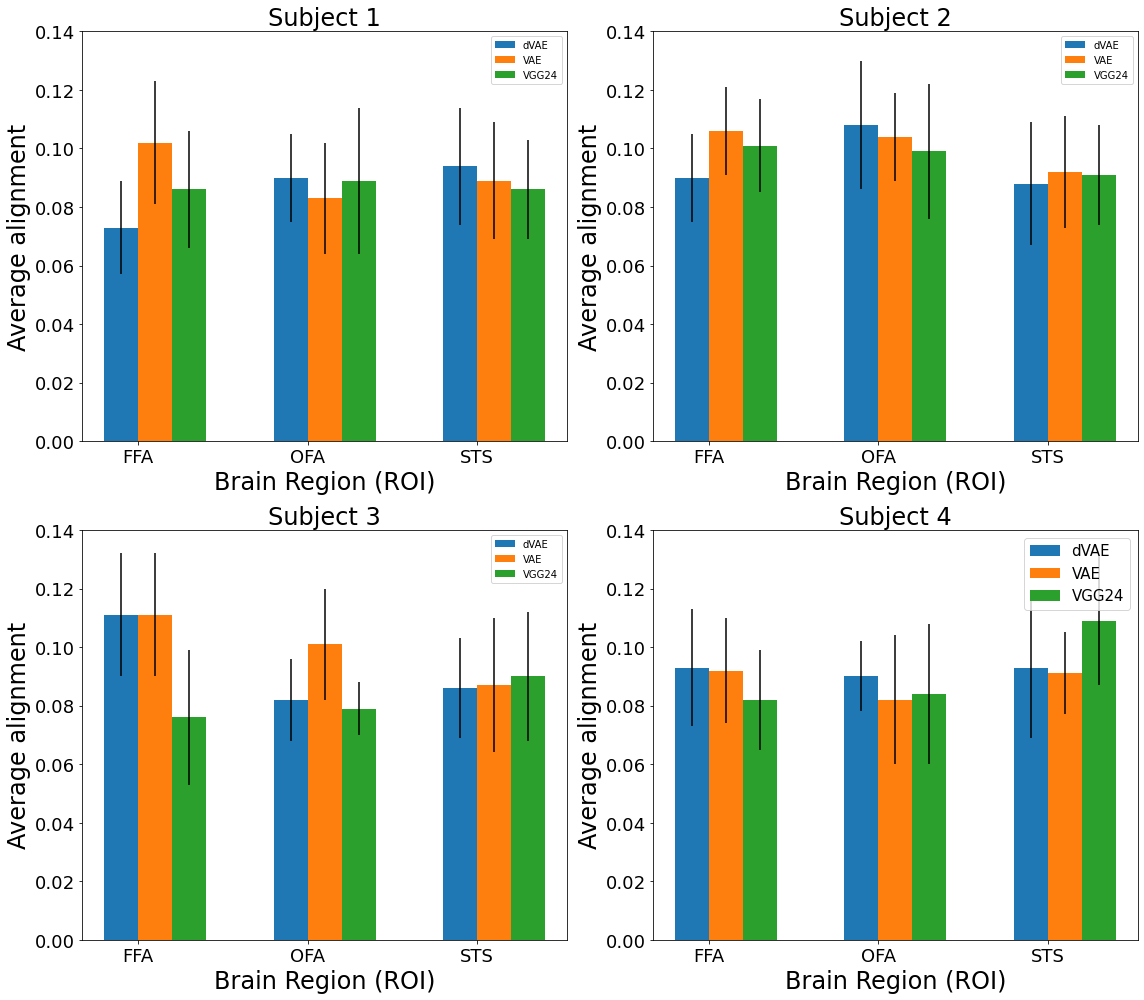

In [18]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['FFA', 'OFA', 'STS']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

Y_RANGE = [0, .14]
fig, axs = plt.subplots(2, 2, figsize=(16, 14))


for i, ax in zip(range(1,5), axs.flat):
    subject = SUBJECT_NUM_TO_DATA[i]

    #fig, ax = plt.subplots()
    rects2 = ax.bar(x - width/2, subject['dVAE'][0], width, label='dVAE', yerr=subject['dVAE'][1])
    rects3 = ax.bar(x + width/2, subject['VAE'][0], width, label='VAE', yerr=subject['VAE'][1])
    rects4 = ax.bar(x + 1.5*width, subject['VGG24'][0], width, label='VGG24', yerr=subject['VGG24'][1])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average alignment',fontsize=big_font)
    ax.set_title('Subject {}'.format(i),fontsize=big_font)
    ax.tick_params(axis='y', labelsize=medium_font )
    ax.set_xticks(x)
    ax.set_xlabel('Brain Region (ROI)',fontsize=big_font)
    ax.set_xticklabels(labels, fontsize=medium_font)
    ax.legend()
    #ax.label_outer()
    ax.set_ylim(Y_RANGE)
    plt.legend(prop={'size': 15})
    #ax.bar_label(rects1, padding=3)
    #ax.bar_label(rects2, padding=3)


fig.tight_layout()
plt.savefig('per_subject_alignment.pdf')
plt.show()


ValueError: x and y must be the same size

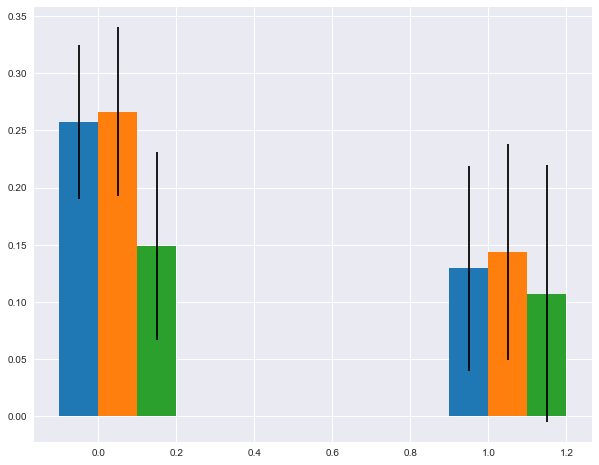

In [11]:
labels = ['FFA', 'OFA']
x = np.arange(len(labels))

dVAE_test_results = np.empty((N_SUBJECTS, N_ROIS))
for key in SUBJECT_NUM_TO_DATA:
    value = SUBJECT_NUM_TO_DATA[key]
    dVAE_test_results[key-1] = value['dVAE'][0]
dVAE_test_average = np.average(dVAE_test_results, axis=0)
dVAE_test_std = np.std(dVAE_test_results, axis=0)


VAE_test_results = np.empty((N_SUBJECTS, N_ROIS))
for key in SUBJECT_NUM_TO_DATA:
    value = SUBJECT_NUM_TO_DATA[key]
    VAE_test_results[key-1] = value['VAE'][0]
VAE_test_average = np.average(VAE_test_results, axis=0)
VAE_test_std = np.std(VAE_test_results, axis=0)


VGG_test_results = np.empty((N_SUBJECTS, N_ROIS))
for key in SUBJECT_NUM_TO_DATA:
    value = SUBJECT_NUM_TO_DATA[key]
    VGG_test_results[key-1] = value['VGG24'][0]
VGG_test_average = np.average(VGG_test_results, axis=0)
VGG_test_std = np.std(VGG_test_results, axis=0)

# Bar chart
fig, ax = plt.subplots(figsize=(10, 8))

rects2 = ax.bar(x - width/2, dVAE_test_average[:2], width, label='dVAE (disentangled)', yerr=dVAE_test_std[:2]/2, color='#1f77b4')
rects3 = ax.bar(x + width/2, VAE_test_average[:2], width, label='VAE (generative)', yerr=VAE_test_std[:2]/2, color='#ff7f0e')
rects4 = ax.bar(x + 1.5*width, VGG_test_average[:2], width, label='VGG24 (discriminative)', yerr=VGG_test_std[:2]/2, color='#2ca02c')

# Scatter plot
split_test_x = x - 1.5*width
dvae_x = x - .5*width
vae_x = x + .5*width
vgg_x = x + 1.5*width

i_to_marker = {
    1: '+',
    2: 'x',
    3: 'o',
    4: 's'
}

for i_subject in range(1, 1+N_SUBJECTS):
    x_ = np.concatenate([dvae_x, vae_x, vgg_x])
    subject = SUBJECT_NUM_TO_DATA[i_subject]
    y_ = np.concatenate([subject['dVAE'][0],subject['VAE'][0],subject['VGG24'][0]])
    #ax.scatter(x_, y_, zorder=2, label='Subject {}'.format(i_subject))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average alignment',fontsize=big_font)
#ax.set_title('Average subject',fontsize=big_font)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=medium_font)
ax.set_xlabel('Brain Region (ROI)',fontsize=big_font)
ax.legend()
ax.tick_params(axis='y', labelsize=medium_font )
plt.legend(prop={'size': 15})
ax.set_ylim([0,.12])
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
plt.savefig('average_subject_alignment.pdf')
fig.tight_layout()
plt.show()


In [103]:
dVAE_test_results

array([[ 0.152,  0.101, -0.05 ],
       [ 0.315,  0.338, -0.114],
       [ 0.113,  0.014, -0.075],
       [ 0.449,  0.267,  0.158]])

In [104]:
dVAE_test_average

array([ 0.25725,  0.18   , -0.02025])

In [85]:
value['dVAE']

([0.449, 0.267, 0.158], [0.13, 0.124, 0.114])

In [93]:
np.std([[ 0.152,  0.101, -0.05 ],
       [ 0.315,  0.338, -0.114],
       [ 0.113,  0.014, -0.075],
       [ 0.449,  0.267,  0.158]], 0)

array([0.1341536 , 0.12877306, 0.10540962])

In [88]:
dVAE_test_std

array([0.1341536 , 0.12877306, 0.10540962])